In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.patches as patches
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
path_to_labels = "/home/mlrig/Documents/Yolo3 Implementation/data/training/label_2/"
labels = os.listdir(path_to_labels)
path_to_images = "/home/mlrig/Documents/Yolo3 Implementation/data/training/image_2//"
images = os.listdir(path_to_images)
image = np.random.choice(images)
image_selected = np.random.choice(labels)
f = open(os.path.join(path_to_labels,image_selected), "r")
data = f.read()

In [3]:
    chunk = data.split("\n")[0].split(" ")
    d = {"image":[image],"type":[chunk[0]],"left":[chunk[4]],"top":[chunk[5]],"right":[chunk[6]],"bottom":[chunk[7]]}
    df = pd.DataFrame(data=d,index =[0])
    
    d

{'image': ['001910.png'],
 'type': ['Car'],
 'left': ['523.76'],
 'top': ['182.06'],
 'right': ['566.25'],
 'bottom': ['215.25']}

In [4]:
for image in labels:
    f = open(os.path.join(path_to_labels,image), "r")
    data = f.read()
    chunk = data.split("\n")[0].split(" ")
   # print(chunk)
    image_selected = image_selected.split(".")[0]
    d["image"].append(image_selected)
    d["type"].append(chunk[0])
    d["left"].append(chunk[4])
    d["top"].append(chunk[5])
    d["right"].append(chunk[6])
    d["bottom"].append(chunk[7])
df = pd.DataFrame(data=d)
df

,image,type,left,top,right,bottom
0,001910.png,Car,523.76,182.06,566.25,215.25
1,003940,Van,619.65,101.71,774.09,216.33
2,003940,Car,782.65,159.66,1065.88,343.01
3,003940,Car,0.00,50.52,361.48,374.00
4,003940,Car,640.41,170.09,700.96,229.40
...,...,...,...,...,...,...
7477,003940,Pedestrian,766.53,177.16,798.53,254.60
7478,003940,Car,572.51,172.60,615.06,211.38
7479,003940,Car,596.71,174.68,624.59,201.52
7480,003940,Car,536.17,186.97,568.98,211.73


In [5]:
#img = cv2.imread(os.path.join(path_to_images,files[0].split(".")[0]+".png"),cv2.IMREAD_COLOR)
data = df.sample(1,replace=True)
float(data["bottom"])
data

,image,type,left,top,right,bottom
353,003940,Car,636.08,183.08,681.65,215.49


/home/mlrig/Documents/Yolo3 Implementation/data/training/image_2//003940.png


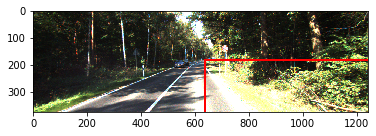

In [26]:
path = os.path.join(path_to_images,str(data["image"]).split(" ")[4].split("\n")[0])+".png"
print(path)
im = np.array(Image.open(path), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect = patches.Rectangle((float(data["bottom"]),float(data["left"])),float(data["right"]),float(data["top"]),linewidth=5)
rect = patches.Rectangle((636.08,183.08),681.65,215.49,linewidth=2,edgecolor='r',facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
